In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
import warnings 
warnings.filterwarnings('ignore')

In [2]:
def get_outlier(df=None, column=None, weight=0.8):
    import numpy as np
    age_group_list = [20,30,40,50,60,70]
    outlier_index_set = set()
    
    
    for age_group in age_group_list:
        # fraud에 해당하는 column 데이터만 추출, 1/4 분위와 3/4 분위 지점을 np.percentile로 구함. 
        fraud = df[df['연령대_1']==age_group][column]
        quantile_25 = np.percentile(fraud.values, 25)
        quantile_75 = np.percentile(fraud.values, 75)
        iqr = quantile_75 - quantile_25
        iqr_weight = iqr * weight
        lowest_val = quantile_25 - iqr_weight
        highest_val = quantile_75 + iqr_weight
        # 최대값 보다 크거나, 최소값 보다 작은 값을 아웃라이어로 설정하고 DataFrame index 반환. 
        outlier_index_set = outlier_index_set | set(fraud[(fraud < lowest_val) | (fraud > highest_val)].index)
        
    return outlier_index_set

def remove_outlier(df=None,column_list=None):
    outlier_index_set = set()
    
    for column_name in column_list:
        outlier_index = get_outlier(df=df, column=column_name, weight=0)
        outlier_index_set = outlier_index_set | outlier_index
        
    df.drop(list(outlier_index_set), inplace=True)


In [87]:
for m in tqdm(range(1,10),desc='월단위 진행'):
    globals()["ts{}".format(m)] = pd.read_csv(f'./data/2022.{m}월_29개 통신정보.csv',encoding='cp949')
    try : 
        globals()["ts{}".format(m)].drop(columns=['행정동코드','행정동','총인구수','1인가구수'],inplace=True)    
    except:
        globals()["ts{}".format(m)].drop(columns=['행정동코드','행정동명','총인구','1인가구수'],inplace=True)  
    globals()["ts{}".format(m)].drop(columns=globals()["ts{}".format(m)].filter(like='4분위수'),inplace=True)
    globals()["ts{}".format(m)].drop(columns=globals()["ts{}".format(m)].filter(like='미추정'),inplace=True) 
    
    # 데이터가 평균값을 제시하고 그 외 4분위 관련 수치를 따로 제공해주고 있음 -> 이미 전처리가 되어있는 거 같음..?
    globals()["ts{}".format(m)]['연령대_1'] = globals()["ts{}".format(m)]['연령대']//10*10
    globals()["ts{}".format(m)]['월'] = int(m)
    fix = globals()["ts{}".format(m)][['월','연령대','연령대_1','자치구','성별']]
    uni = ['상주지','출근','근무','소액결재','연체','카카오톡','SNS','통화','문자','데이터','이동','체류','지하철','게임','금융','쇼핑','동영상','유튜브','넷플릭스','배달']
    
    for col in tqdm(uni,desc=f'{m}월'):
        globals()["{}_{}".format(col,m)] = pd.concat([fix,globals()["ts{}".format(m)].filter(like=col)],axis=1)    
        
        
for col in tqdm(uni,desc='카테고리별로 합치기'):
    globals()["{}".format(col)] = pd.DataFrame()
    for m in range(1,10):
        globals()["이동_{}".format(m)].drop(columns= globals()["이동_{}".format(m)].filter(like='지하철'),inplace=True)
        globals()["{}".format(col)]= pd.concat([globals()["{}".format(col)],globals()["{}_{}".format(col,m)]])

월단위 진행:   0%|          | 0/9 [00:00<?, ?it/s]

1월:   0%|          | 0/20 [00:00<?, ?it/s]

2월:   0%|          | 0/20 [00:00<?, ?it/s]

3월:   0%|          | 0/20 [00:00<?, ?it/s]

4월:   0%|          | 0/20 [00:00<?, ?it/s]

5월:   0%|          | 0/20 [00:00<?, ?it/s]

6월:   0%|          | 0/20 [00:00<?, ?it/s]

7월:   0%|          | 0/20 [00:00<?, ?it/s]

8월:   0%|          | 0/20 [00:00<?, ?it/s]

9월:   0%|          | 0/20 [00:00<?, ?it/s]

카테고리별로 합치기:   0%|          | 0/20 [00:00<?, ?it/s]

In [7]:
ts1.shape

(10176, 37)

In [8]:
ages = [10,20,30,40,50,60,70]
colors = ['red','blue','green','yellow','pink','purple','orange']

# 커뮤니케이션
통화 , 문자, SNS

## 전처리 전

In [80]:
communication = pd.concat([통화,문자.iloc[:,5:],SNS.iloc[:,5:]],axis=1)
len(communication.columns[5:])
communication.reset_index(drop=True, inplace=True)

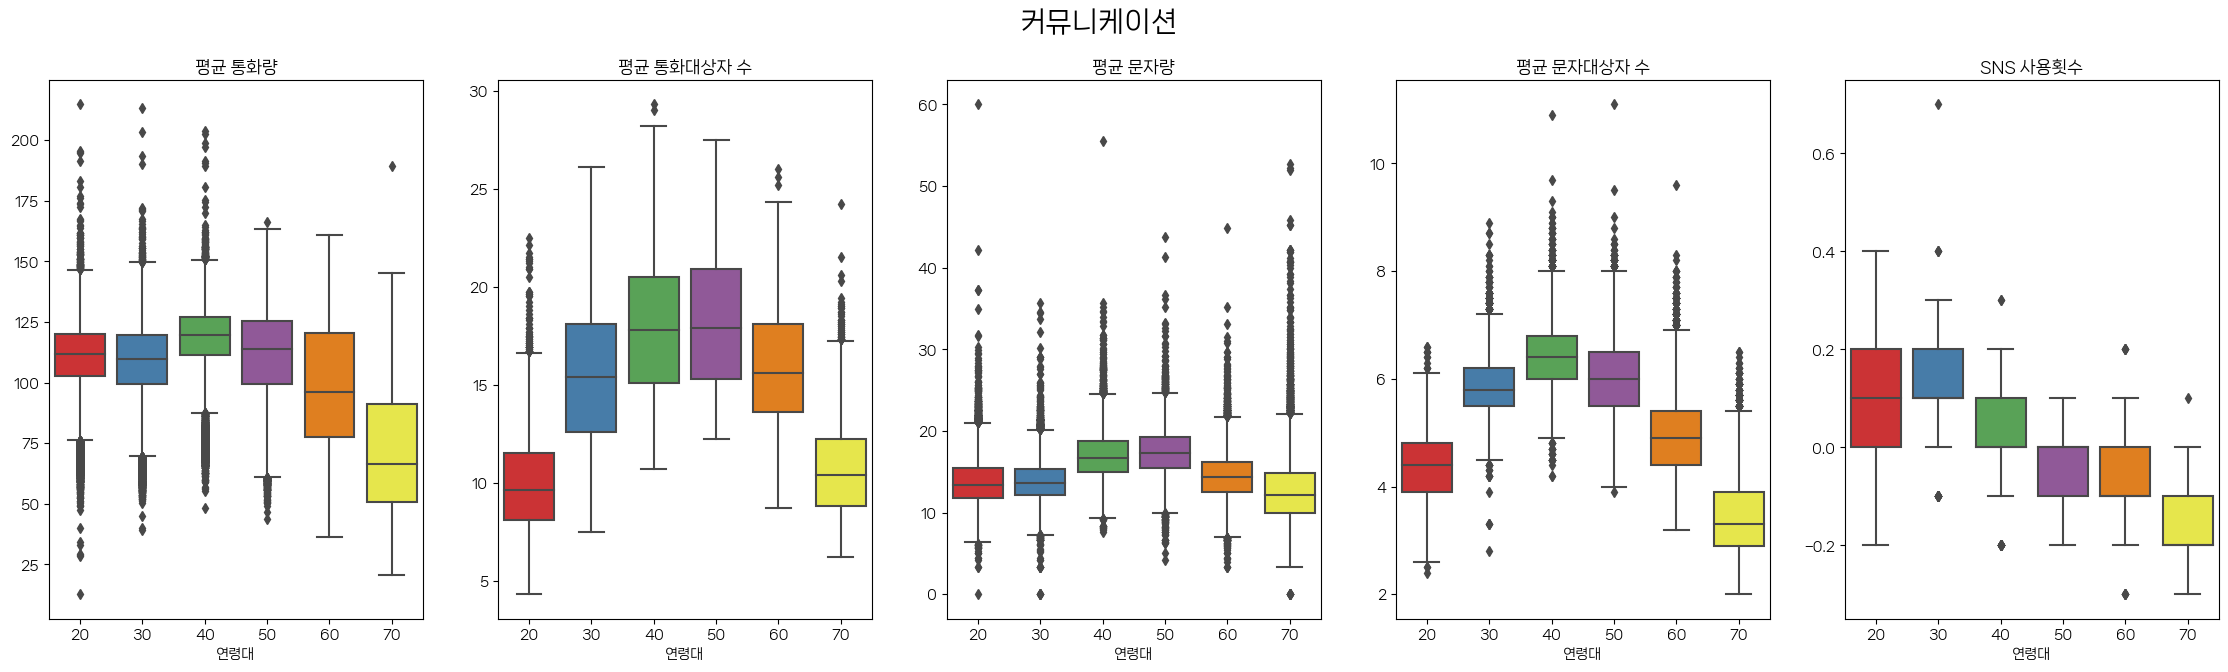

In [81]:
col_lst = communication.columns[5:]
plt.figure(figsize=(28,7))
for idx, col in enumerate(col_lst):
    plt.subplot(1,5,idx+1)
    sns.boxplot(x=communication['연령대_1'],y=communication[col],data=communication,palette='Set1') #hue='부도'
    plt.ylabel('')
    plt.xlabel('연령대')
    plt.title(col_lst[idx])   
    plt.suptitle('커뮤니케이션', fontsize=20,fontweight='bold')
plt.savefig('./result/커뮤니케이션(전).png')
    

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


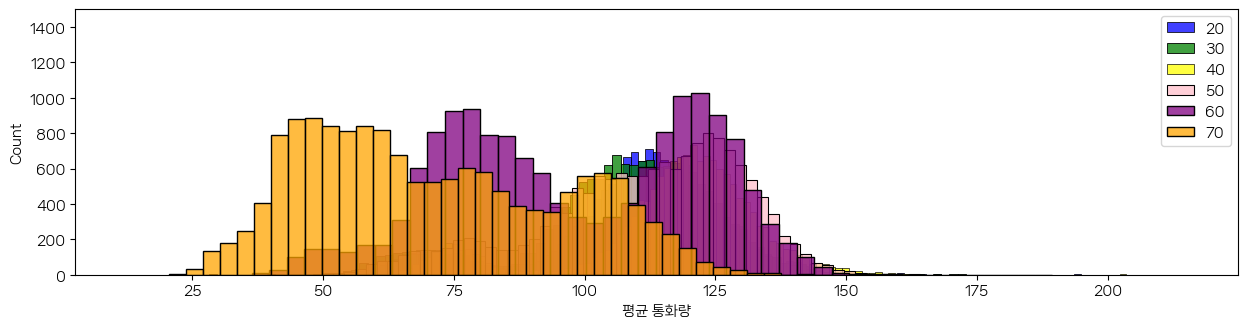

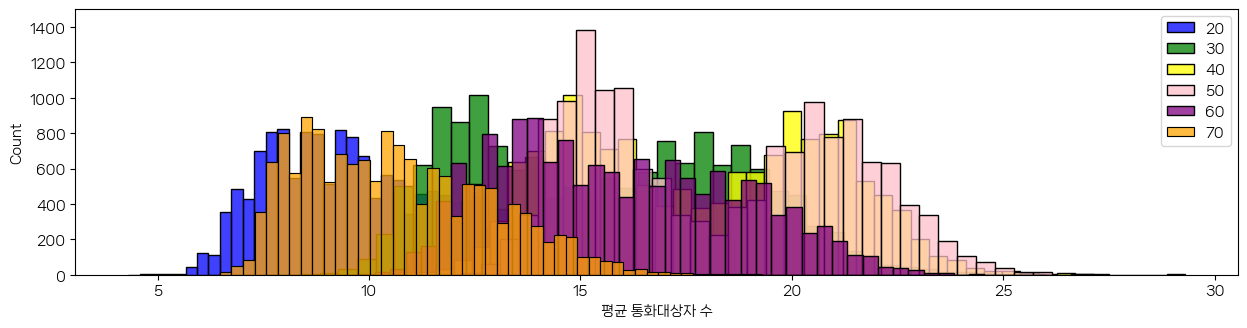

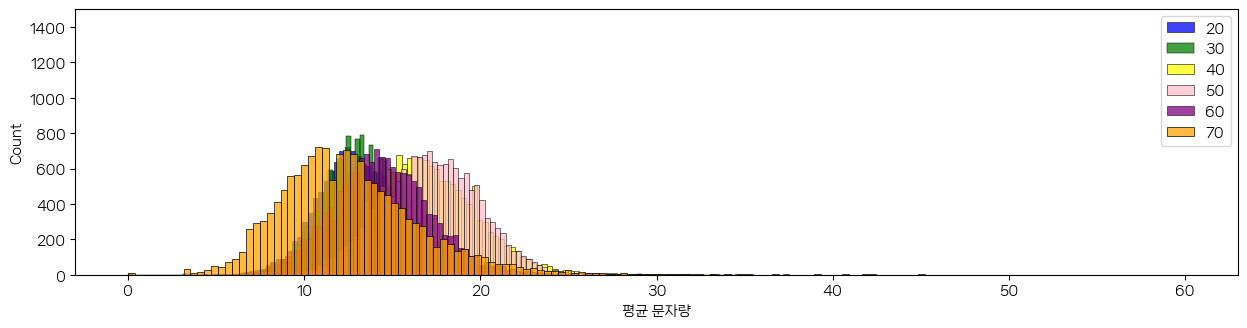

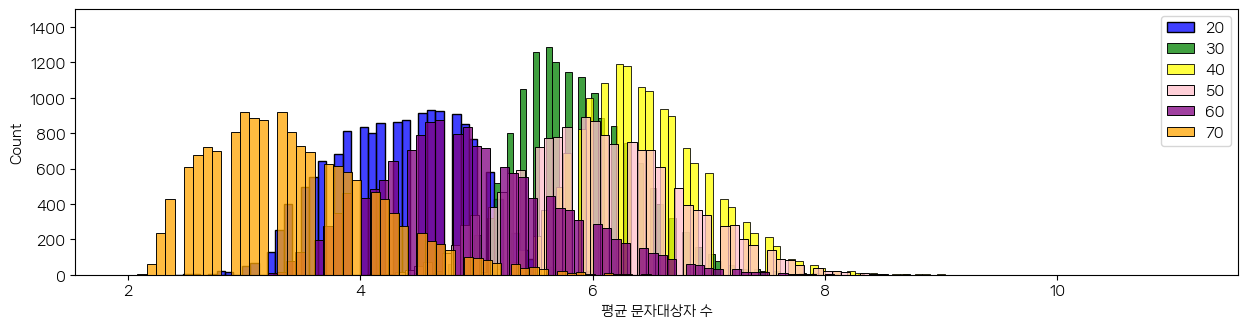

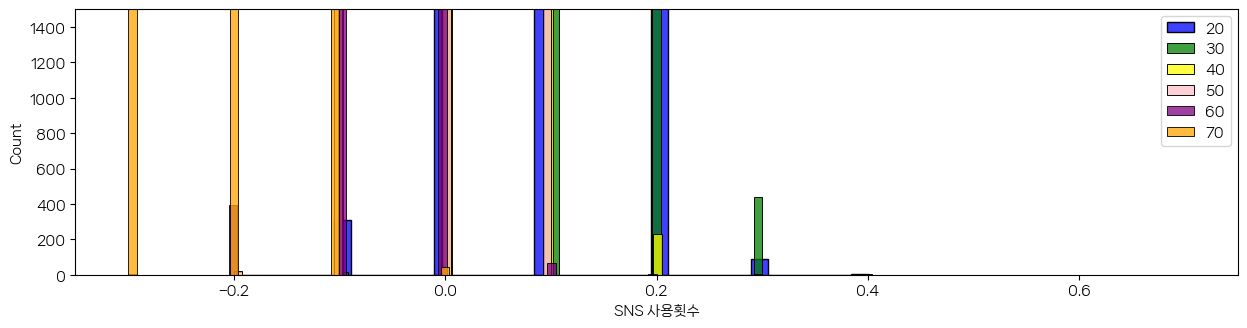

In [14]:
for idx,col in enumerate(col_lst) :
    plt.figure(figsize=(15,20))
    for age,c in zip(ages,colors):    
        plt.subplot(5,1,idx+1)      
        
        sns.histplot(communication[col][communication['연령대_1']==age],color=c,label=age)
        plt.xlabel(col)
        plt.legend() 
        plt.ylim([0,1500])

## 전처리 후
전처리 방법 : 이상치 평균 대체 or  삭제  
이상치 찾기 : 연령대 별로 찾아야함 

In [12]:
remove_outlier(communication,col_lst)

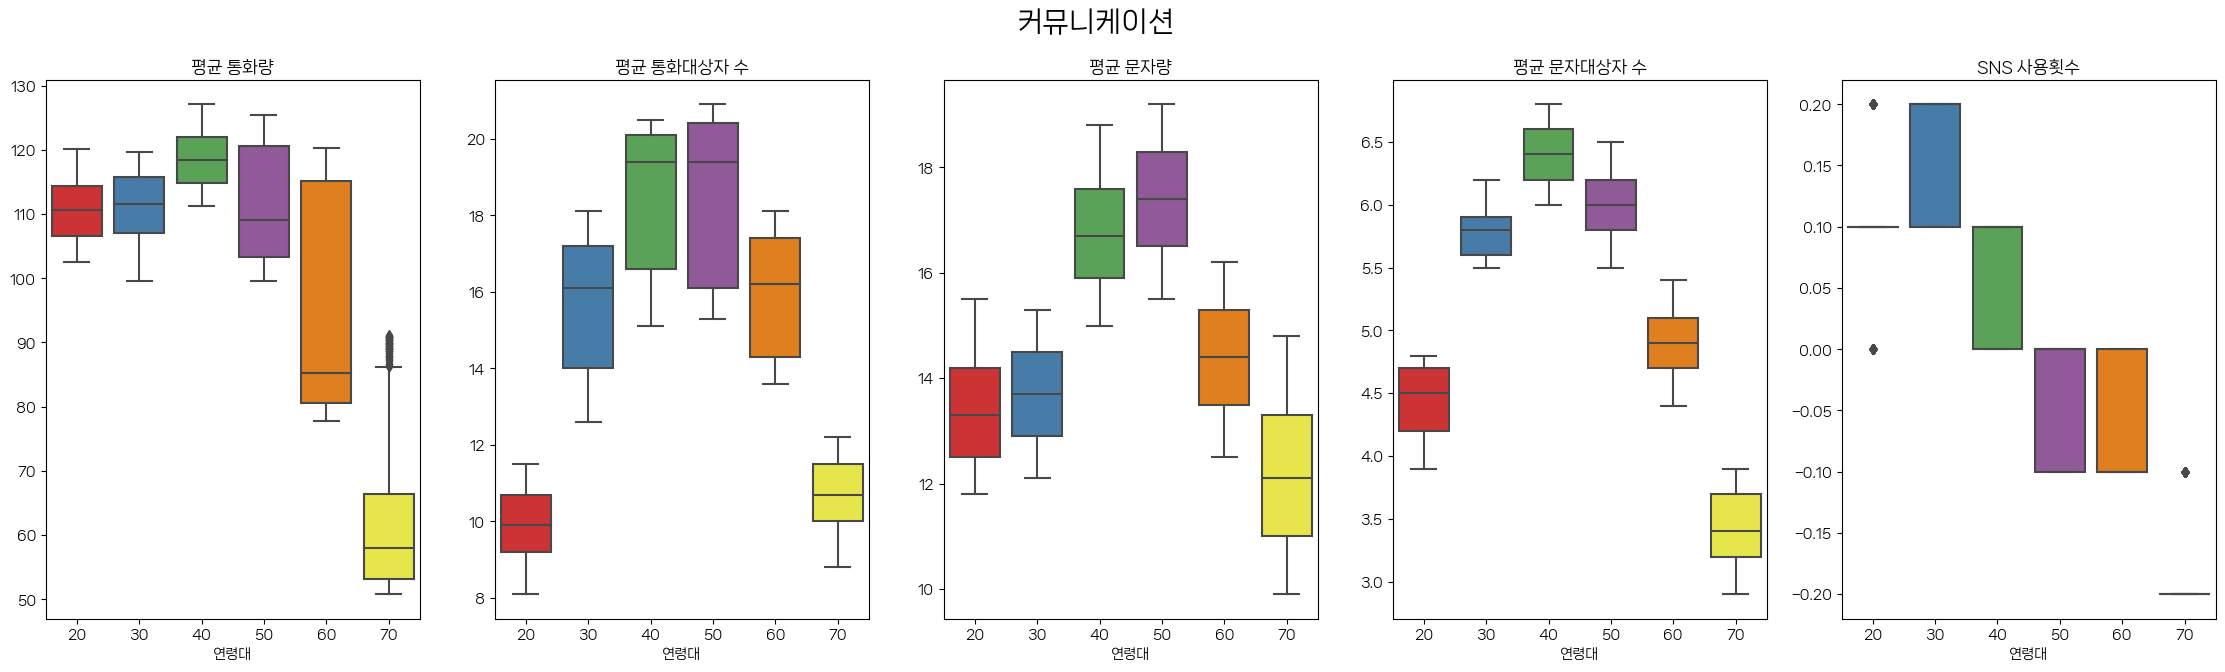

In [79]:
col_lst = communication.columns[5:]
plt.figure(figsize=(28,7))
for idx, col in enumerate(col_lst):
    plt.subplot(1,5,idx+1)
    sns.boxplot(x=communication['연령대_1'],y=communication[col],data=communication,palette='Set1') #hue='부도'
    plt.ylabel('')
    plt.xlabel('연령대')
    plt.title(col_lst[idx])   
    plt.suptitle('커뮤니케이션', fontsize=20,fontweight='bold')
plt.savefig('./result/커뮤니케이션(후).png')

# 재정
소액결재, 연체

## 전처리 전

In [73]:
finance = pd.concat([소액결재,연체.iloc[:,5:]],axis=1)
# finance
len(finance.columns[5:])

5

In [74]:
finance.reset_index(drop=True,inplace=True)

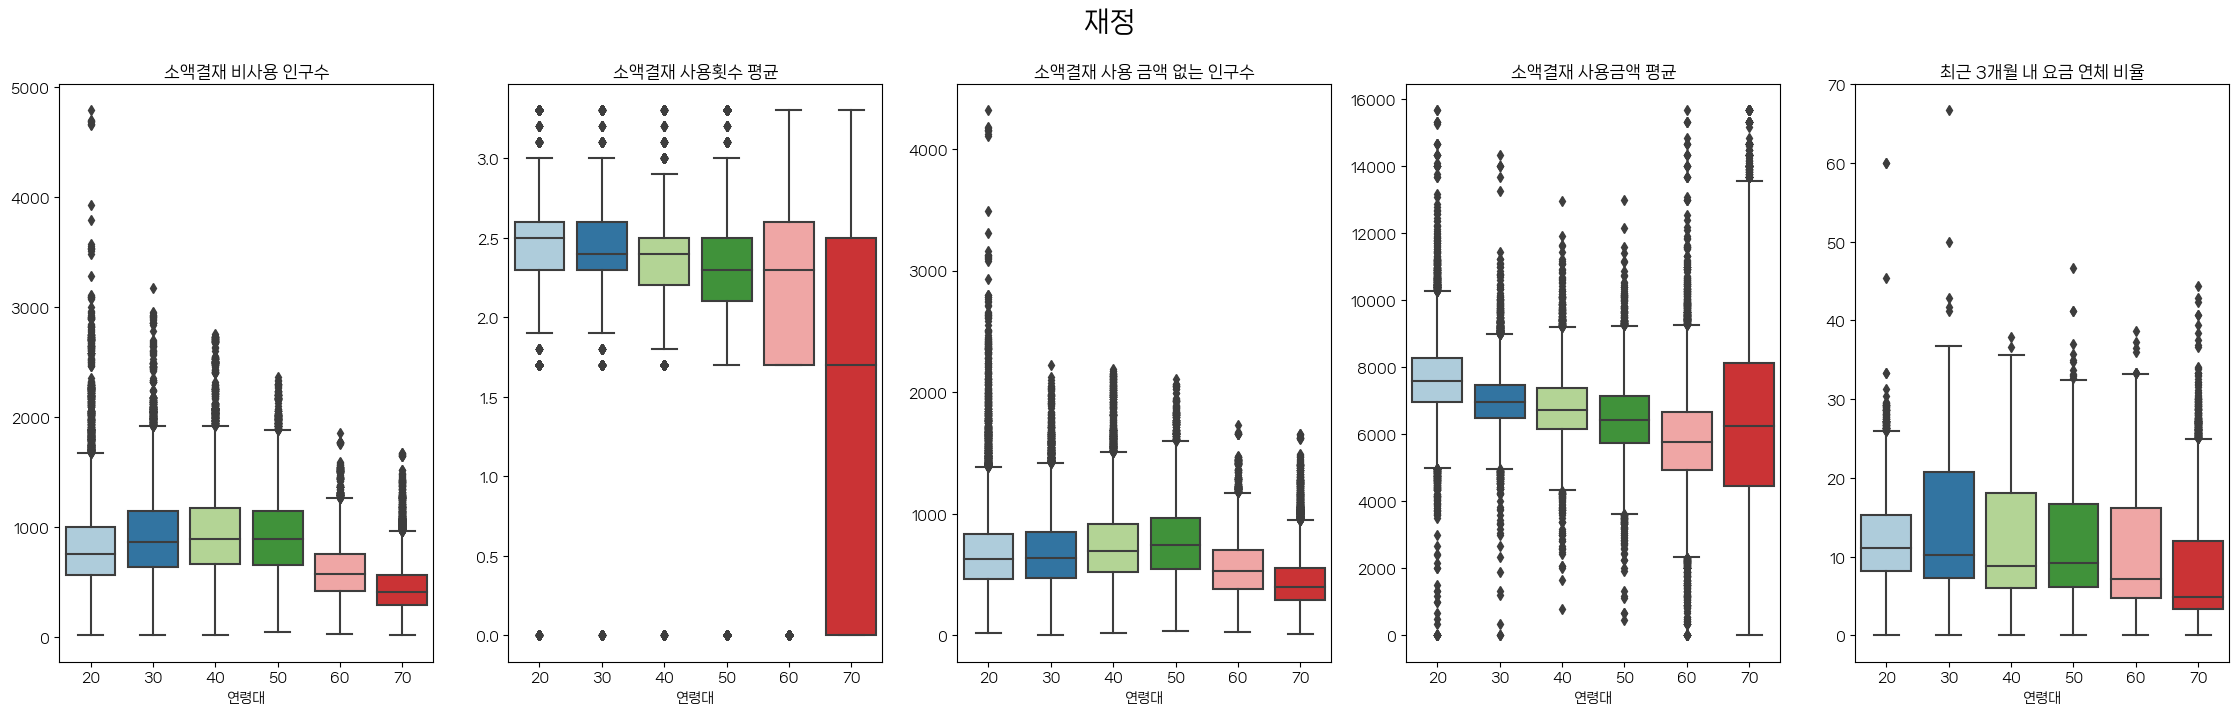

In [76]:
fi_col = finance.columns[5:]
plt.figure(figsize=(28,7.5))
for idx, col in enumerate(fi_col):
    plt.subplot(1,5,idx+1)
    sns.boxplot(x=finance['연령대_1'],y=finance[col],data=finance,palette='Paired') #hue='부도'
    plt.ylabel('')
    plt.xlabel('연령대')
    plt.title(fi_col[idx])   
    plt.suptitle('재정', fontsize=20,fontweight='bold')
plt.savefig('./result/재정(전).png')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


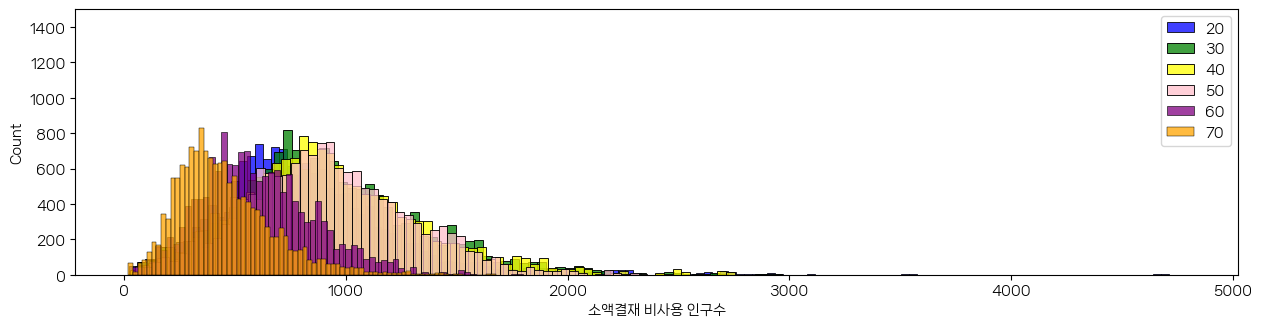

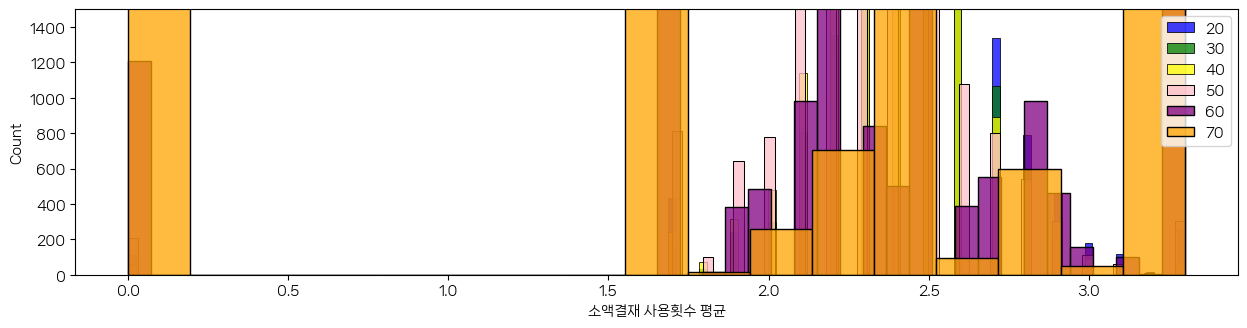

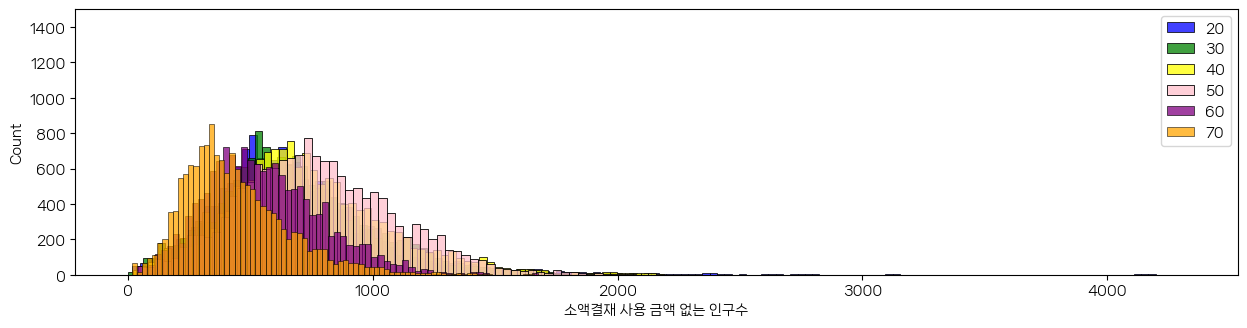

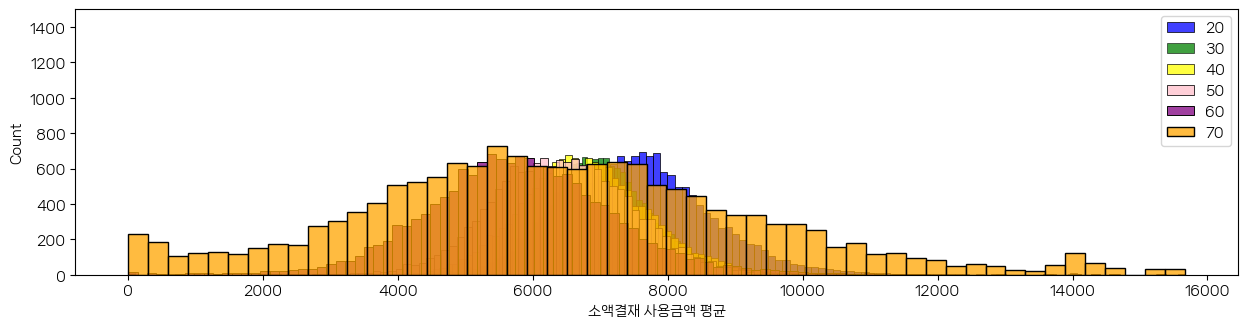

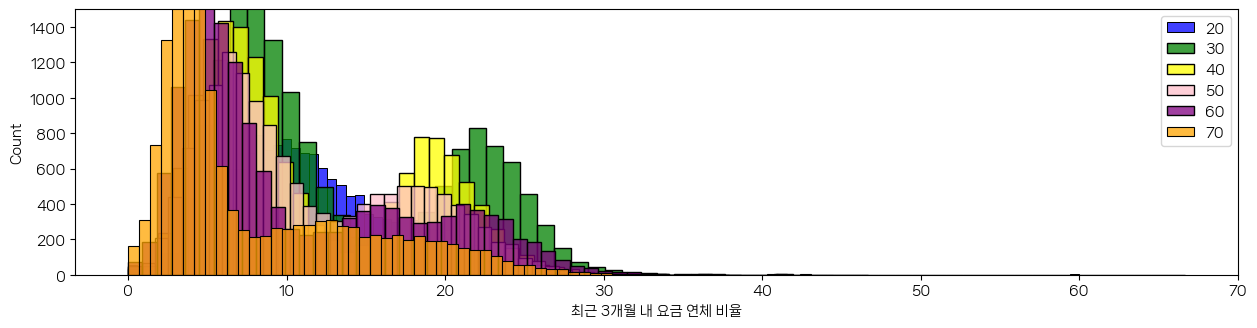

In [21]:
for idx,col in enumerate(fi_col) :
    plt.figure(figsize=(15,20))
    for age,c in zip(ages,colors):    
        plt.subplot(5,1,idx+1)      
        
        sns.histplot(finance[col][finance['연령대_1']==age],color=c,label=age)
        plt.xlabel(col)
        plt.legend() 
        plt.ylim([0,1500])

## 전처리 후

In [77]:
remove_outlier(finance,fi_col)

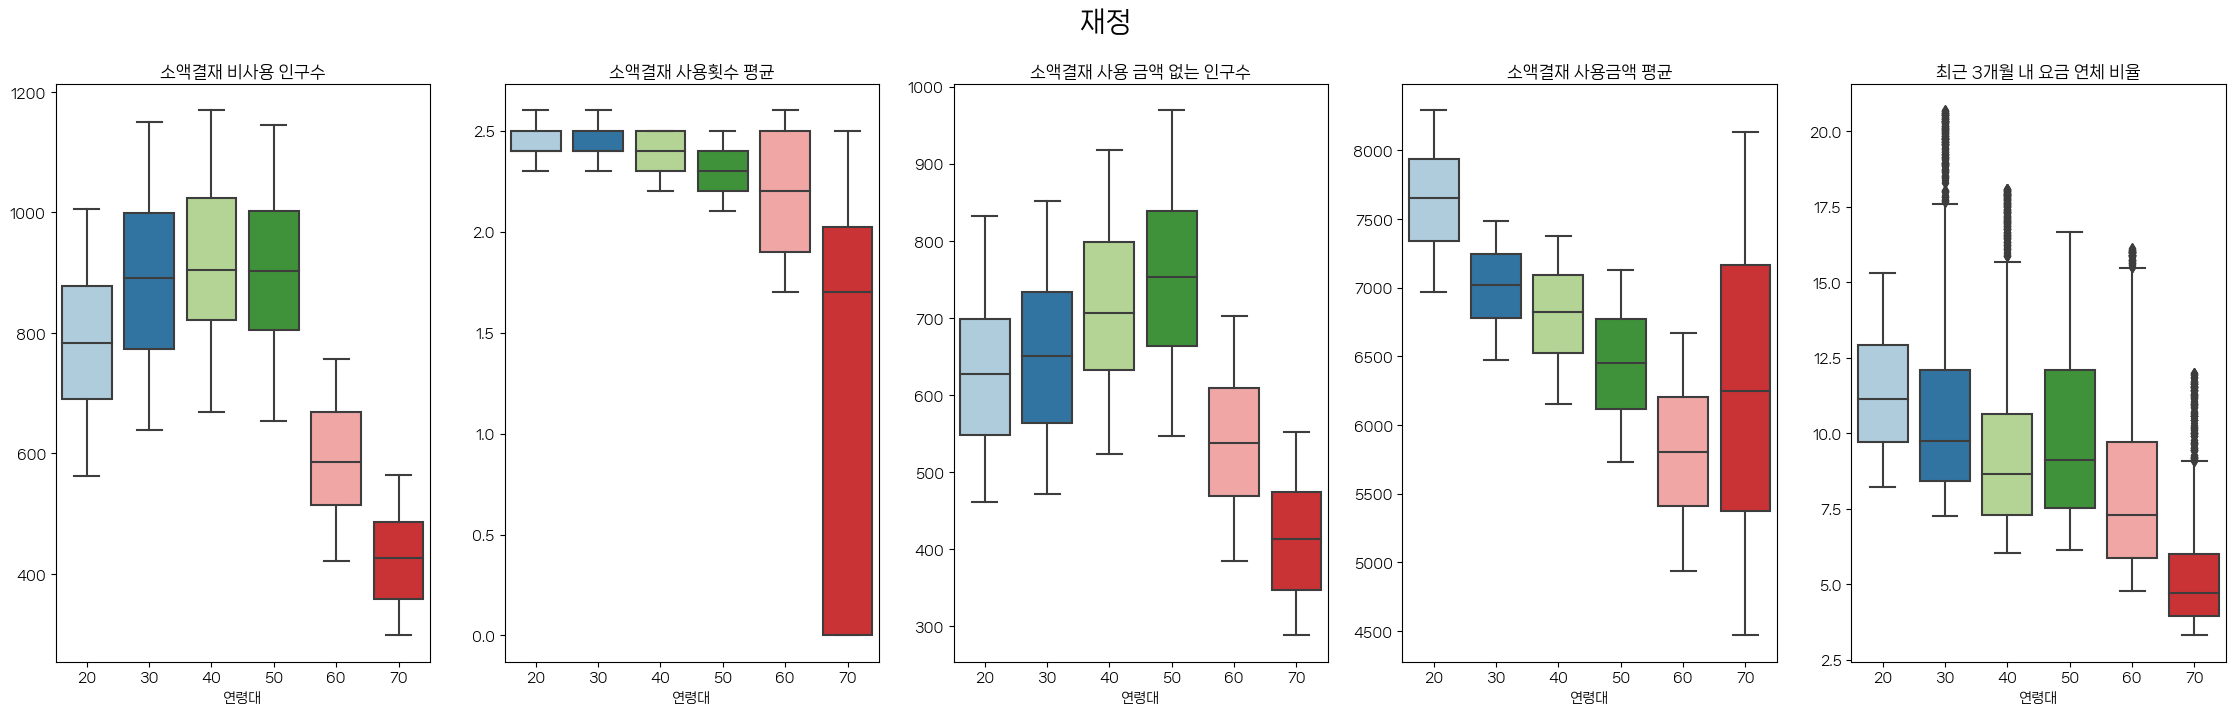

In [78]:
fi_col = finance.columns[5:]
plt.figure(figsize=(28,7.5))
for idx, col in enumerate(fi_col):
    plt.subplot(1,5,idx+1)
    sns.boxplot(x=finance['연령대_1'],y=finance[col],data=finance,palette='Paired') #hue='부도'
    plt.ylabel('')
    plt.xlabel('연령대')
    plt.title(fi_col[idx])   
    plt.suptitle('재정', fontsize=20,fontweight='bold')
plt.savefig('./result/재정(후).png')

# 이동
상주지, 이동, 체류

## 전처리 전

In [54]:
move = pd.concat([상주지,이동.iloc[:,5:], 체류.iloc[:,5:]],axis=1)
# move
len(move.columns[5:])

8

In [55]:
move.reset_index(drop=True, inplace=True)

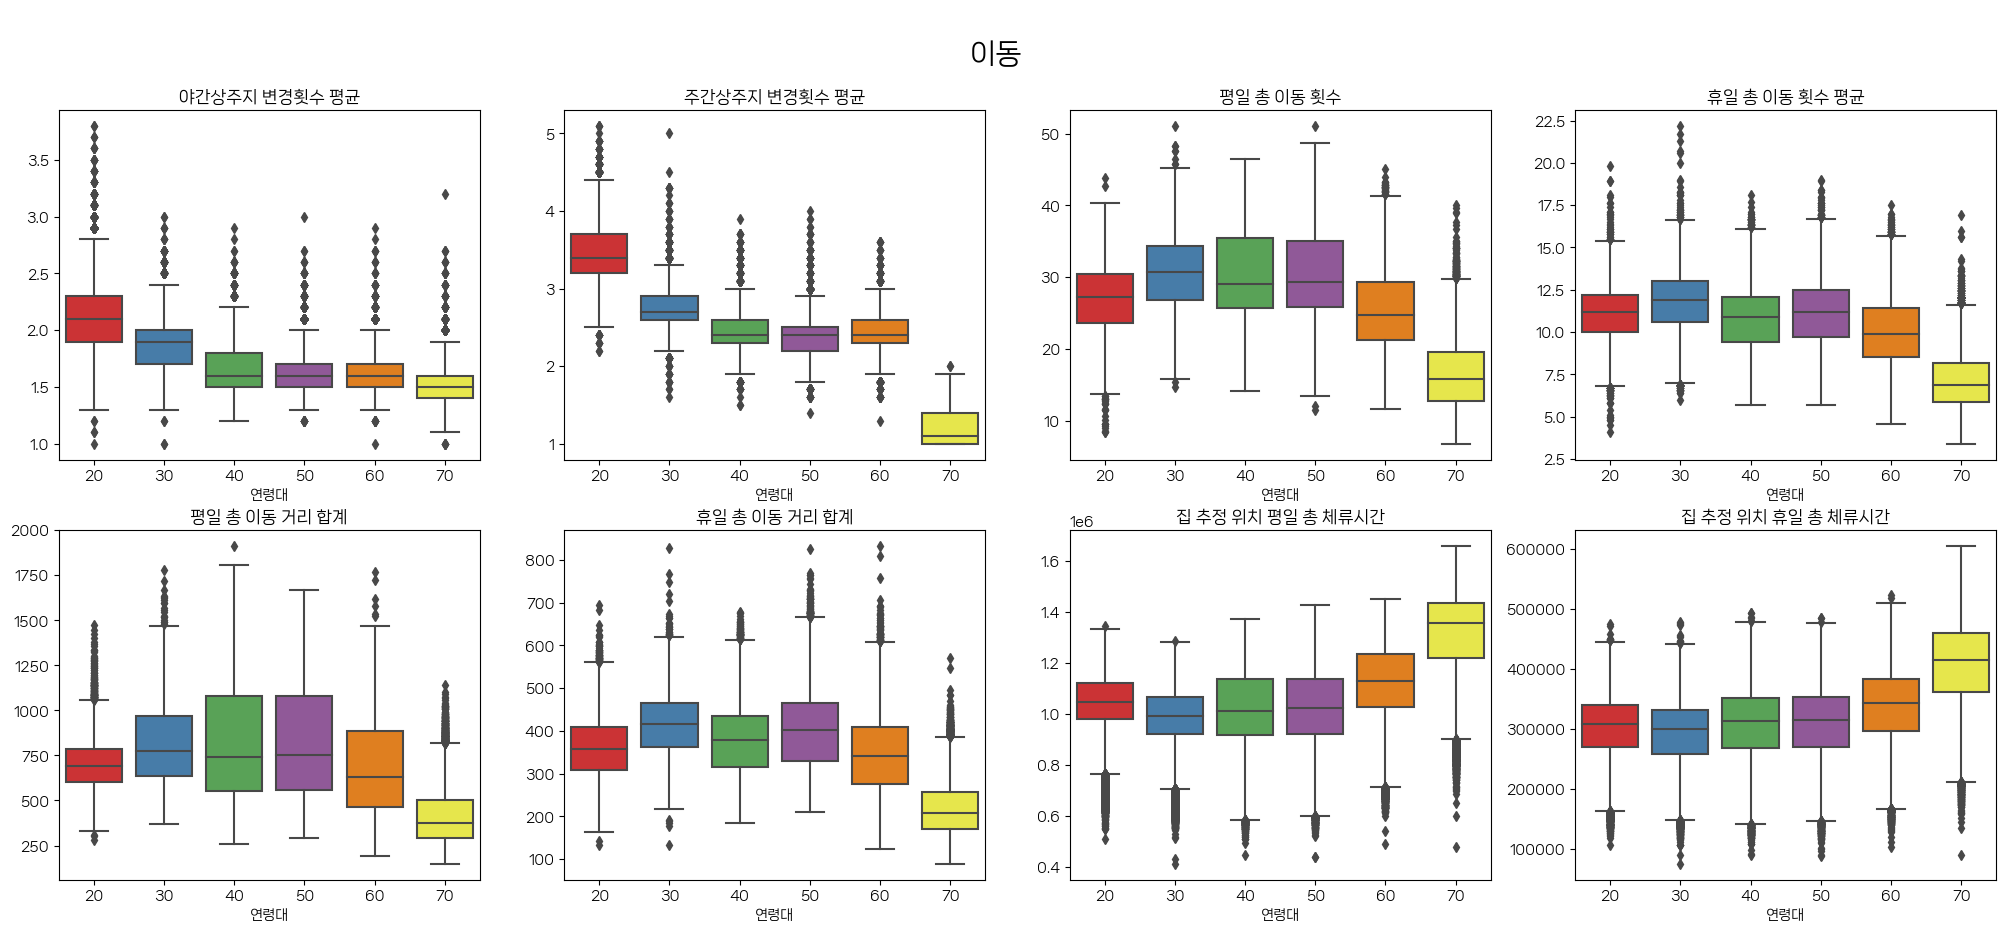

In [53]:
move_col = move.columns[5:]
plt.figure(figsize=(25,10))
for idx, col in enumerate(move_col):
    plt.subplot(2,4,idx+1)
    sns.boxplot(x=move['연령대_1'],y=move[col],data=move,palette='Set1') #hue='부도'
    plt.ylabel('')
    plt.xlabel('연령대')
    plt.title(move_col[idx])   
    plt.suptitle('\n이동', fontsize=20,fontweight='bold')
plt.savefig('./result/이동(전).png')

## 전처리 후

In [56]:
remove_outlier(move,move_col)

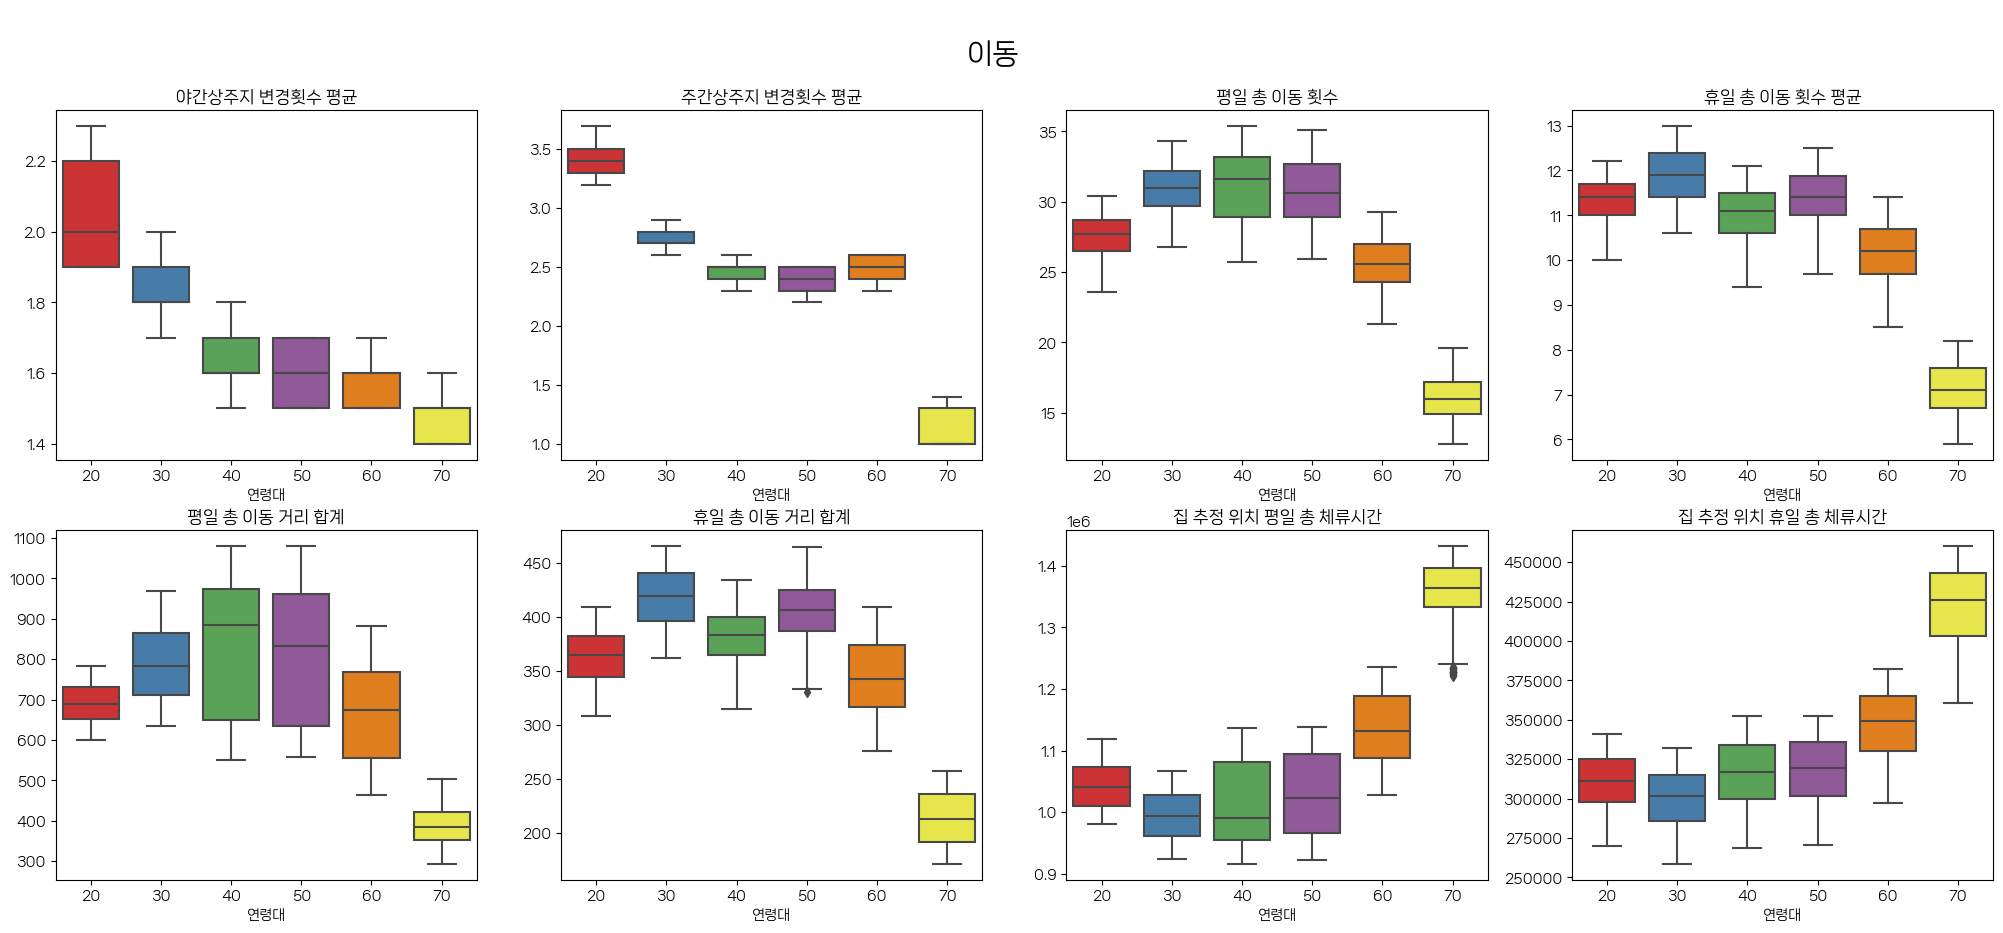

In [57]:
move_col = move.columns[5:]
plt.figure(figsize=(25,10))
for idx, col in enumerate(move_col):
    plt.subplot(2,4,idx+1)
    sns.boxplot(x=move['연령대_1'],y=move[col],data=move,palette='Set1') #hue='부도'
    plt.ylabel('')
    plt.xlabel('연령대')
    plt.title(move_col[idx])   
    plt.suptitle('\n이동', fontsize=20,fontweight='bold')
plt.savefig('./result/이동(후).png')

# 기타이동
출근, 근무, 지하철

## 전처리 전

In [64]:
move2 = pd.concat([출근,근무.iloc[:,5:],지하철.iloc[:,5:]],axis=1)
# move2
len(move2.columns[5:])
move2.reset_index(drop=True,inplace=True)

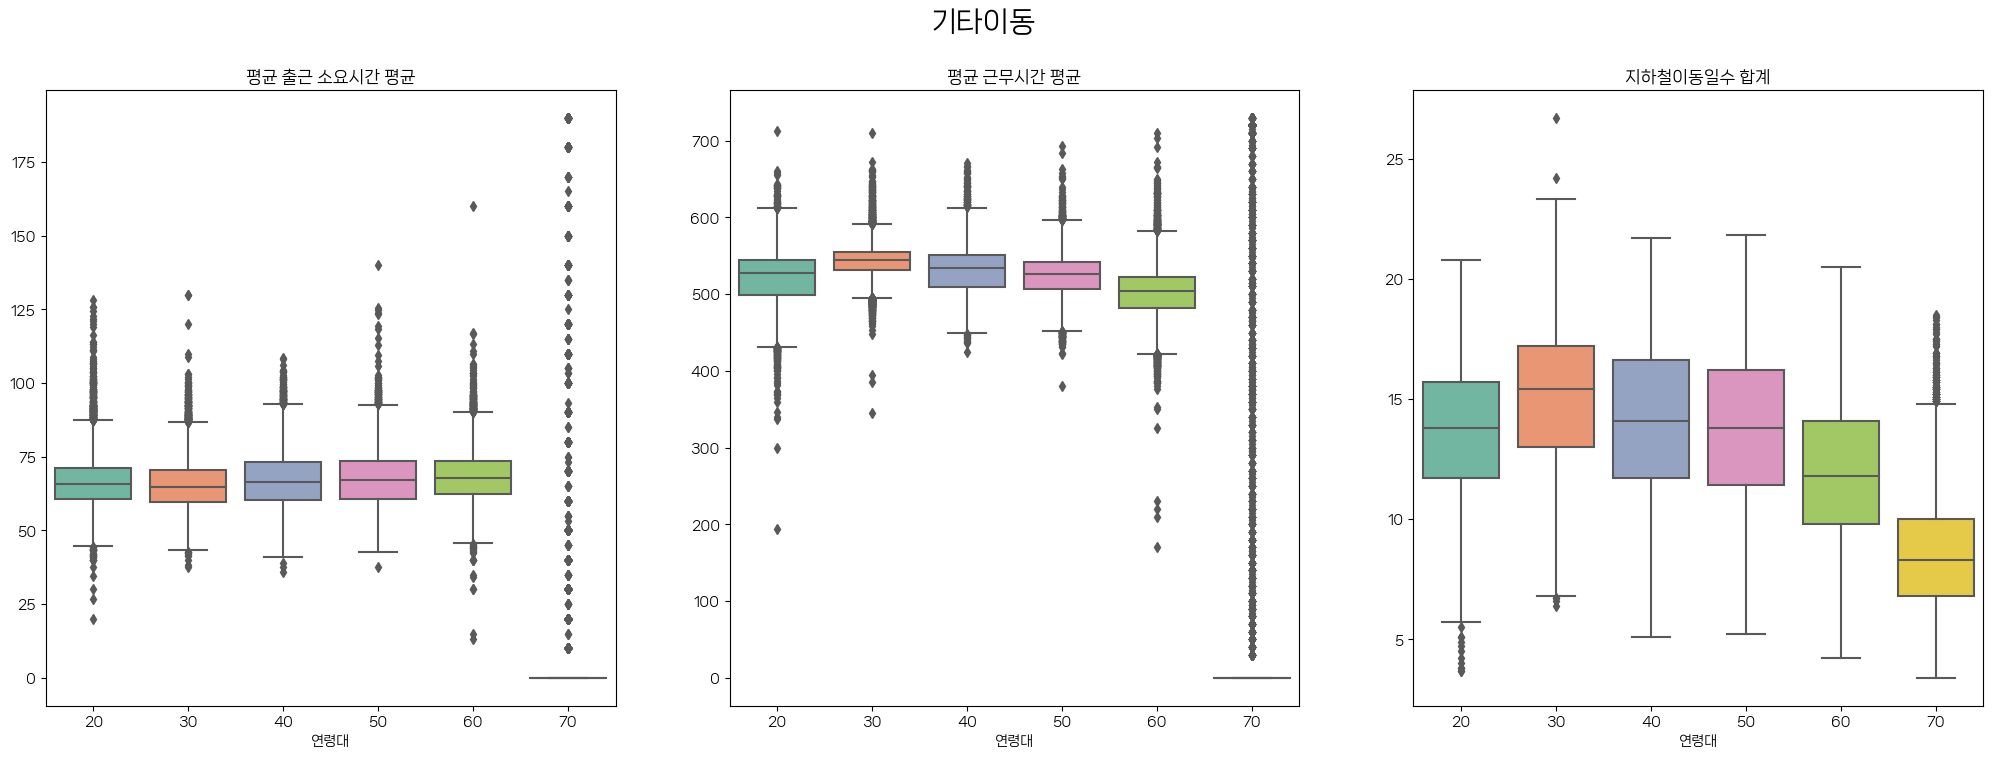

In [65]:
move2_col = move2.columns[5:]
plt.figure(figsize=(25,8))
for idx, col in enumerate(move2_col):
    plt.subplot(1,3,idx+1)
    sns.boxplot(x=move2['연령대_1'],y=move2[col],data=move2,palette='Set2') #hue='부도'
    plt.ylabel('')
    plt.xlabel('연령대')
    plt.title(move2_col[idx])   
    plt.suptitle('기타이동', fontsize=20,fontweight='bold')
plt.savefig('./result/기타이동(전).png')


## 전처리 후

In [66]:
remove_outlier(move2,move2_col)

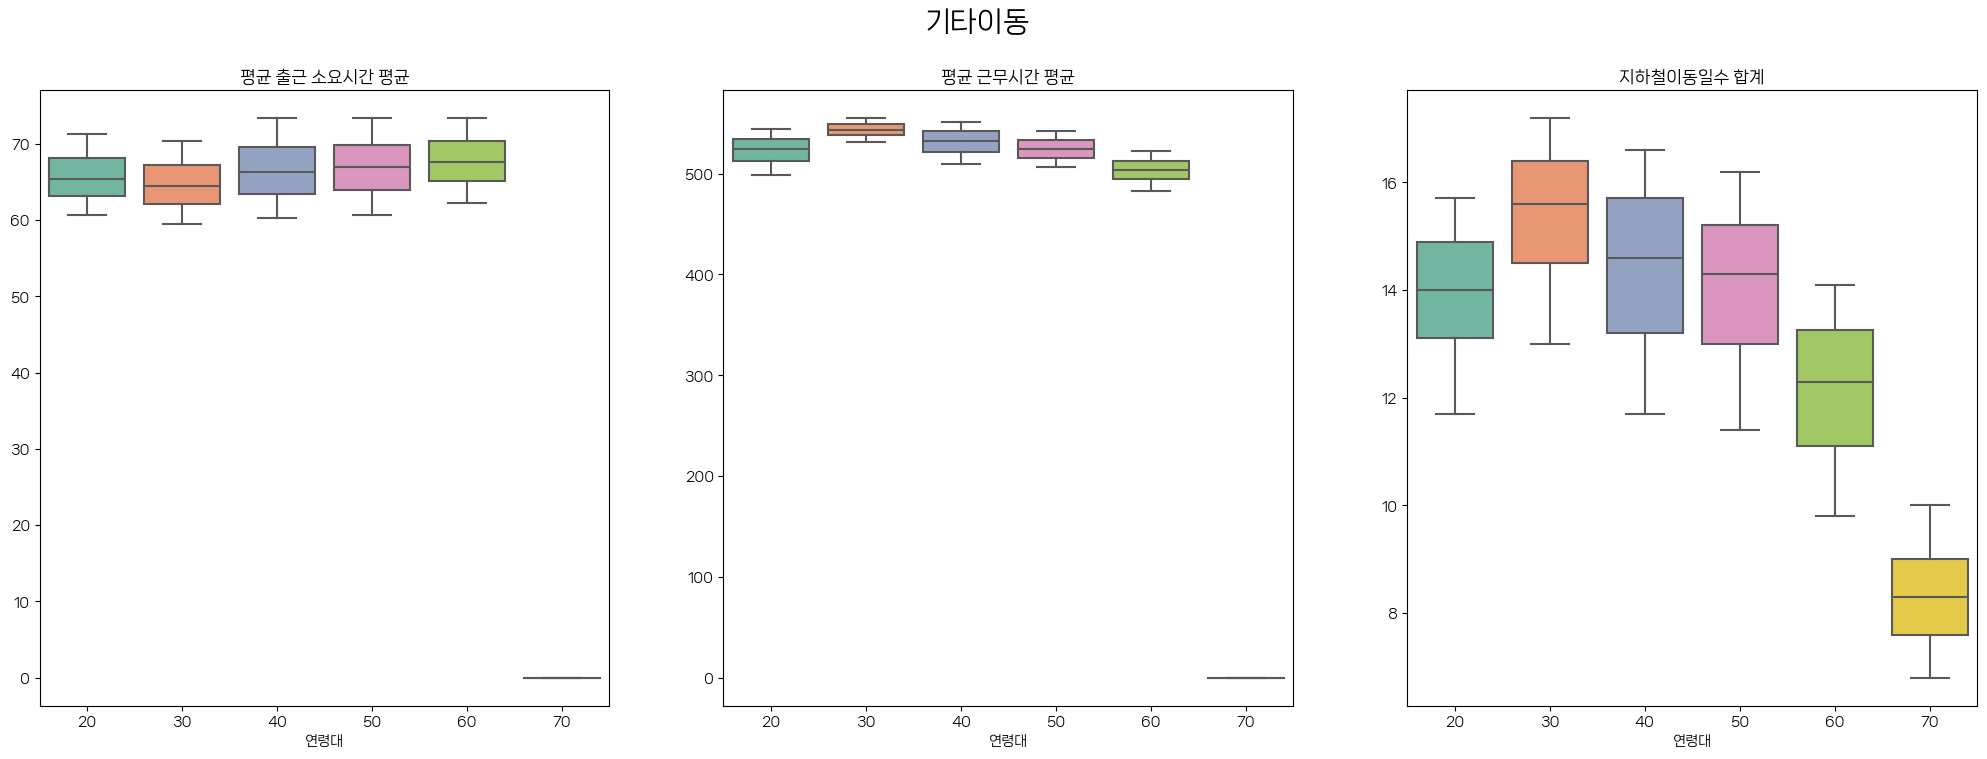

In [67]:
move2_col = move2.columns[5:]
plt.figure(figsize=(25,8))
for idx, col in enumerate(move2_col):
    plt.subplot(1,3,idx+1)
    sns.boxplot(x=move2['연령대_1'],y=move2[col],data=move2,palette='Set2') #hue='부도'
    plt.ylabel('')
    plt.xlabel('연령대')
    plt.title(move2_col[idx])   
    plt.suptitle('기타이동', fontsize=20,fontweight='bold')
plt.savefig('./result/기타이동(후).png')

# 영상서비스
동영상, 유튜브, 넷플릭스

## 전처리 전

In [68]:
video = pd.concat([동영상,유튜브.iloc[:,5:],넷플릭스.iloc[:,5:]],axis=1)
# video
len(video.columns[5:])
video.reset_index(drop=True,inplace=True)

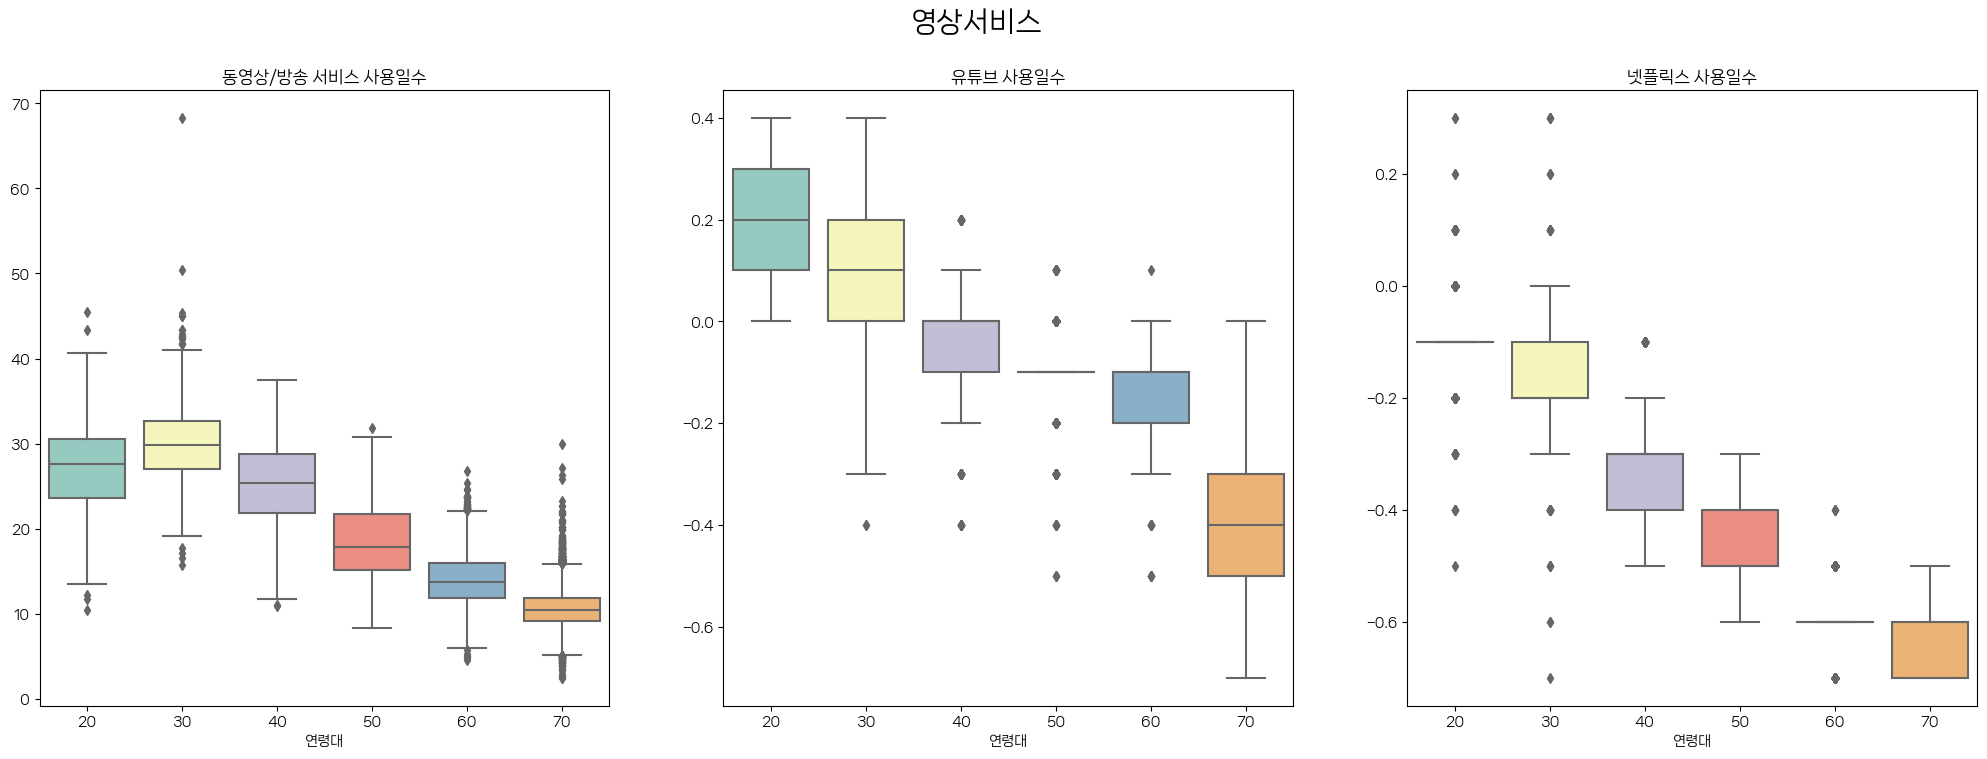

In [69]:
video_col = video.columns[5:]
plt.figure(figsize=(25,8))
for idx, col in enumerate(video_col):
    plt.subplot(1,3,idx+1)
    sns.boxplot(x=video['연령대_1'],y=video[col],data=video,palette='Set3') #hue='부도'
    plt.ylabel('')
    plt.xlabel('연령대')
    plt.title(video_col[idx])   
    plt.suptitle('영상서비스', fontsize=20,fontweight='bold')
plt.savefig('./result/영상서비스(전).png')

## 전처리 후

In [82]:
remove_outlier(video,video_col)

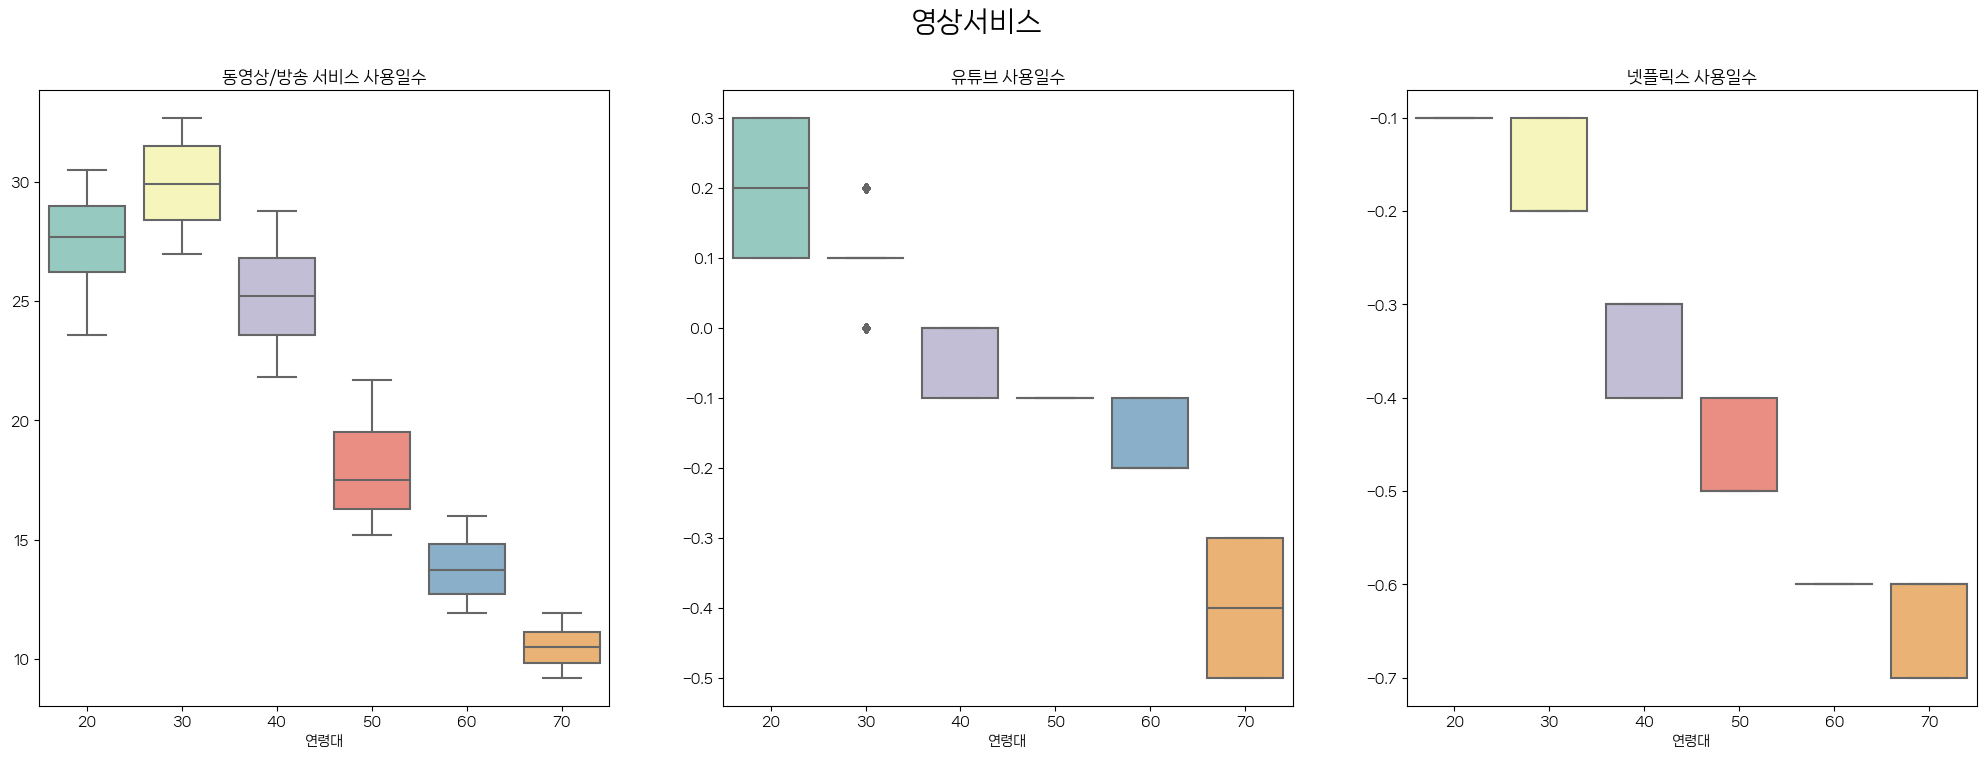

In [83]:
video_col = video.columns[5:]
plt.figure(figsize=(25,8))
for idx, col in enumerate(video_col):
    plt.subplot(1,3,idx+1)
    sns.boxplot(x=video['연령대_1'],y=video[col],data=video,palette='Set3') #hue='부도'
    plt.ylabel('')
    plt.xlabel('연령대')
    plt.title(video_col[idx])   
    plt.suptitle('영상서비스', fontsize=20,fontweight='bold')
plt.savefig('./result/영상서비스(후).png')

# 생활서비스
게임, 금융, 쇼핑, 배달

## 전처리 전

In [84]:
life = pd.concat([게임,금융.iloc[:,5:],쇼핑.iloc[:,5:],배달.iloc[:,5:]],axis=1)
# life
len(life.columns[5:])
life.reset_index(drop=True,inplace=True)

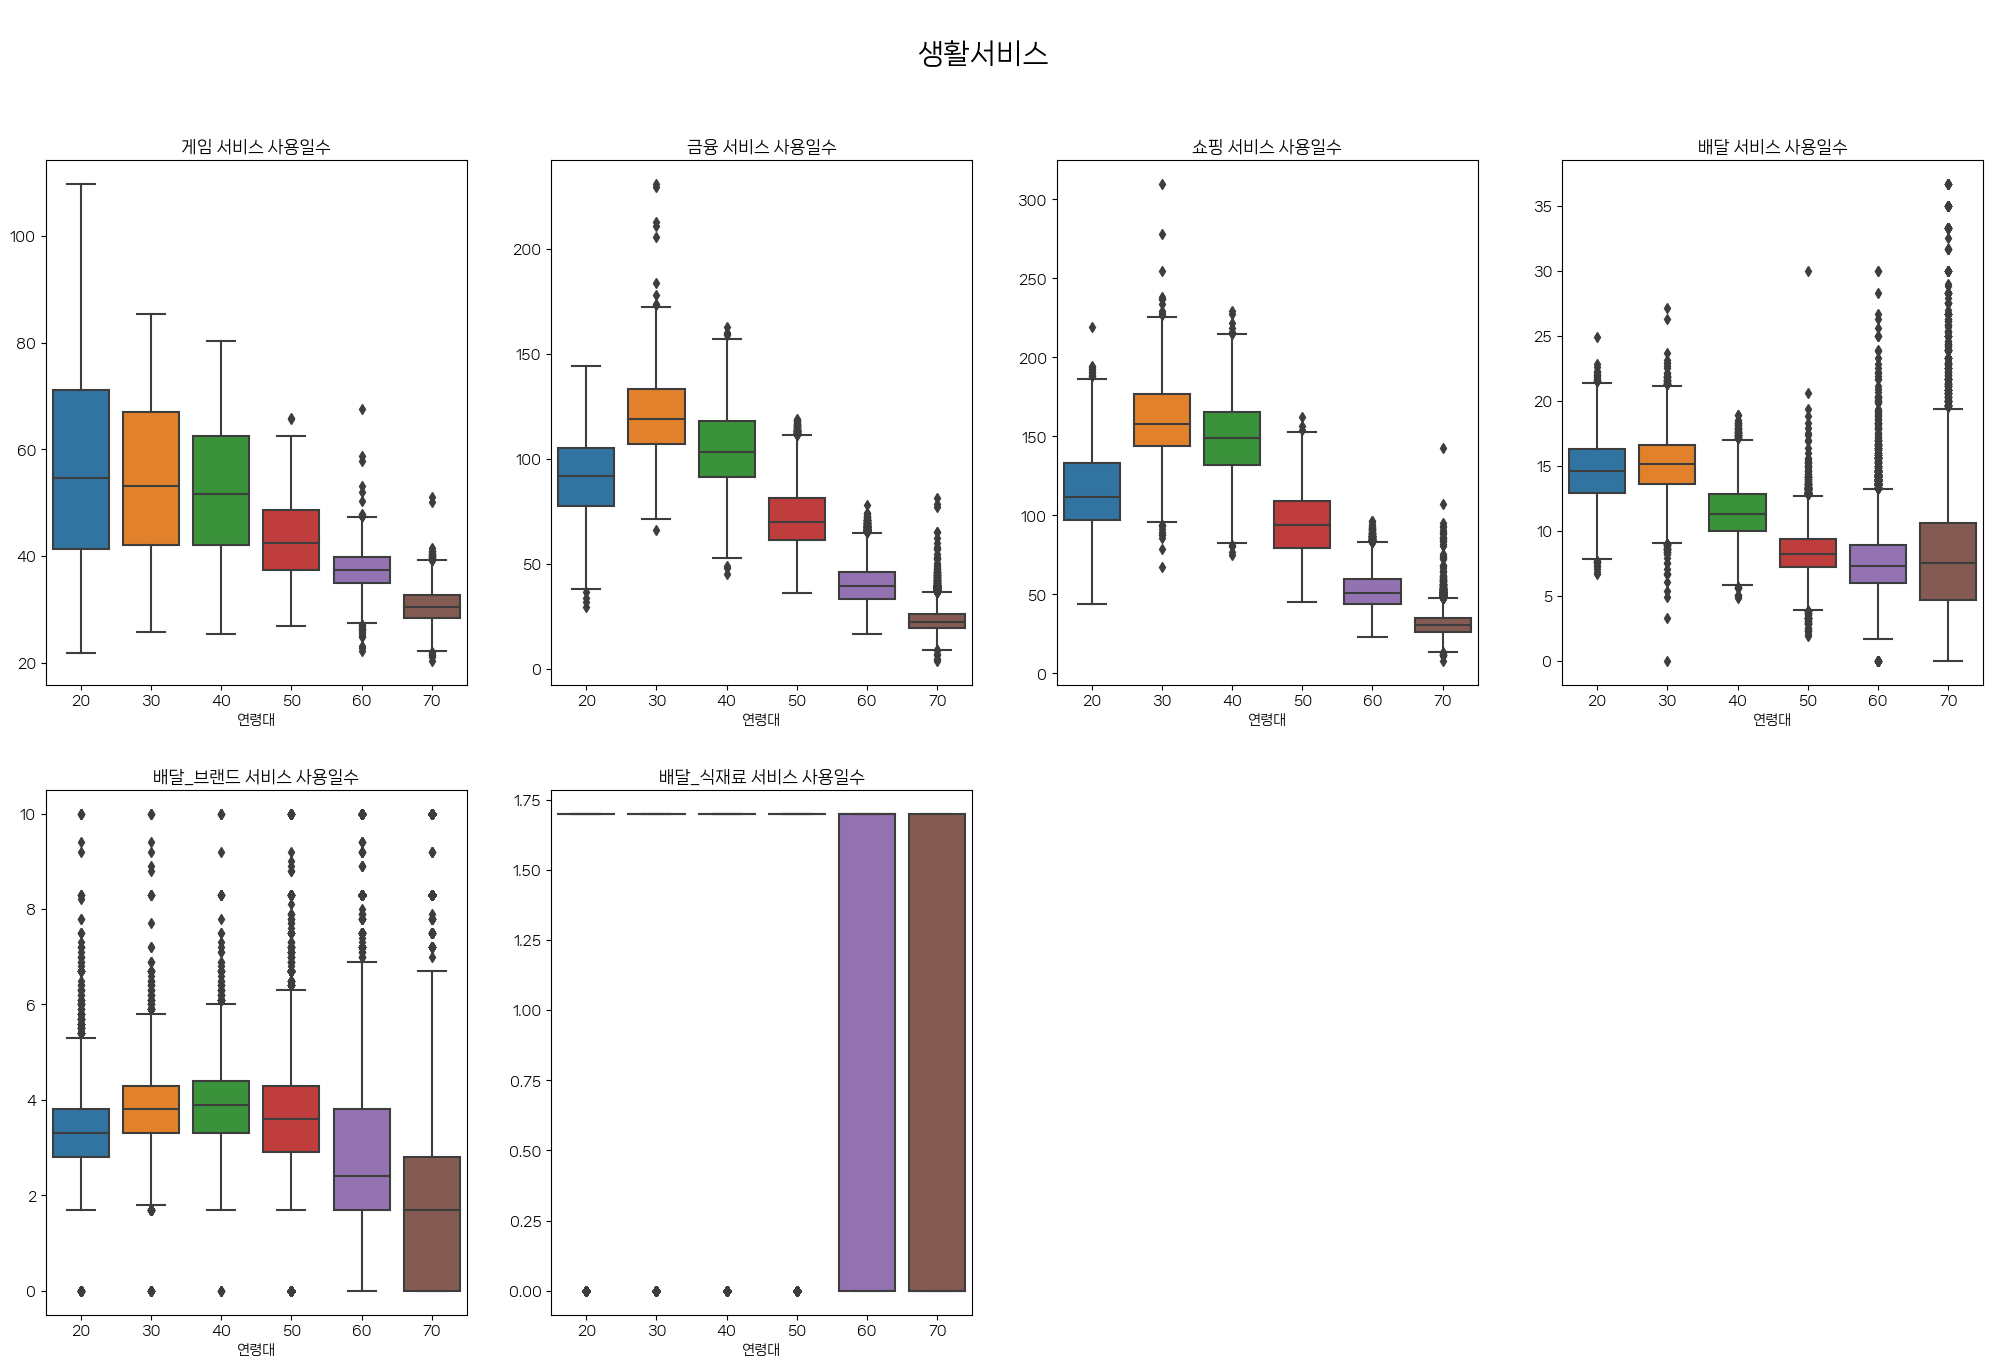

In [85]:
life_col = life.columns[5:]
plt.figure(figsize=(25,15))
for idx, col in enumerate(life_col):
    plt.subplot(2,4,idx+1)
    sns.boxplot(x=life['연령대_1'],y=life[col],data=life,palette='tab10') #hue='부도'
    plt.ylabel('')
    plt.xlabel('연령대')
    plt.title(life_col[idx])   
    plt.suptitle('\n생활서비스', fontsize=20,fontweight='bold')
plt.savefig('./result/생활서비스(전).png')

## 전처리 후

In [35]:
remove_outlier(life,life_col)

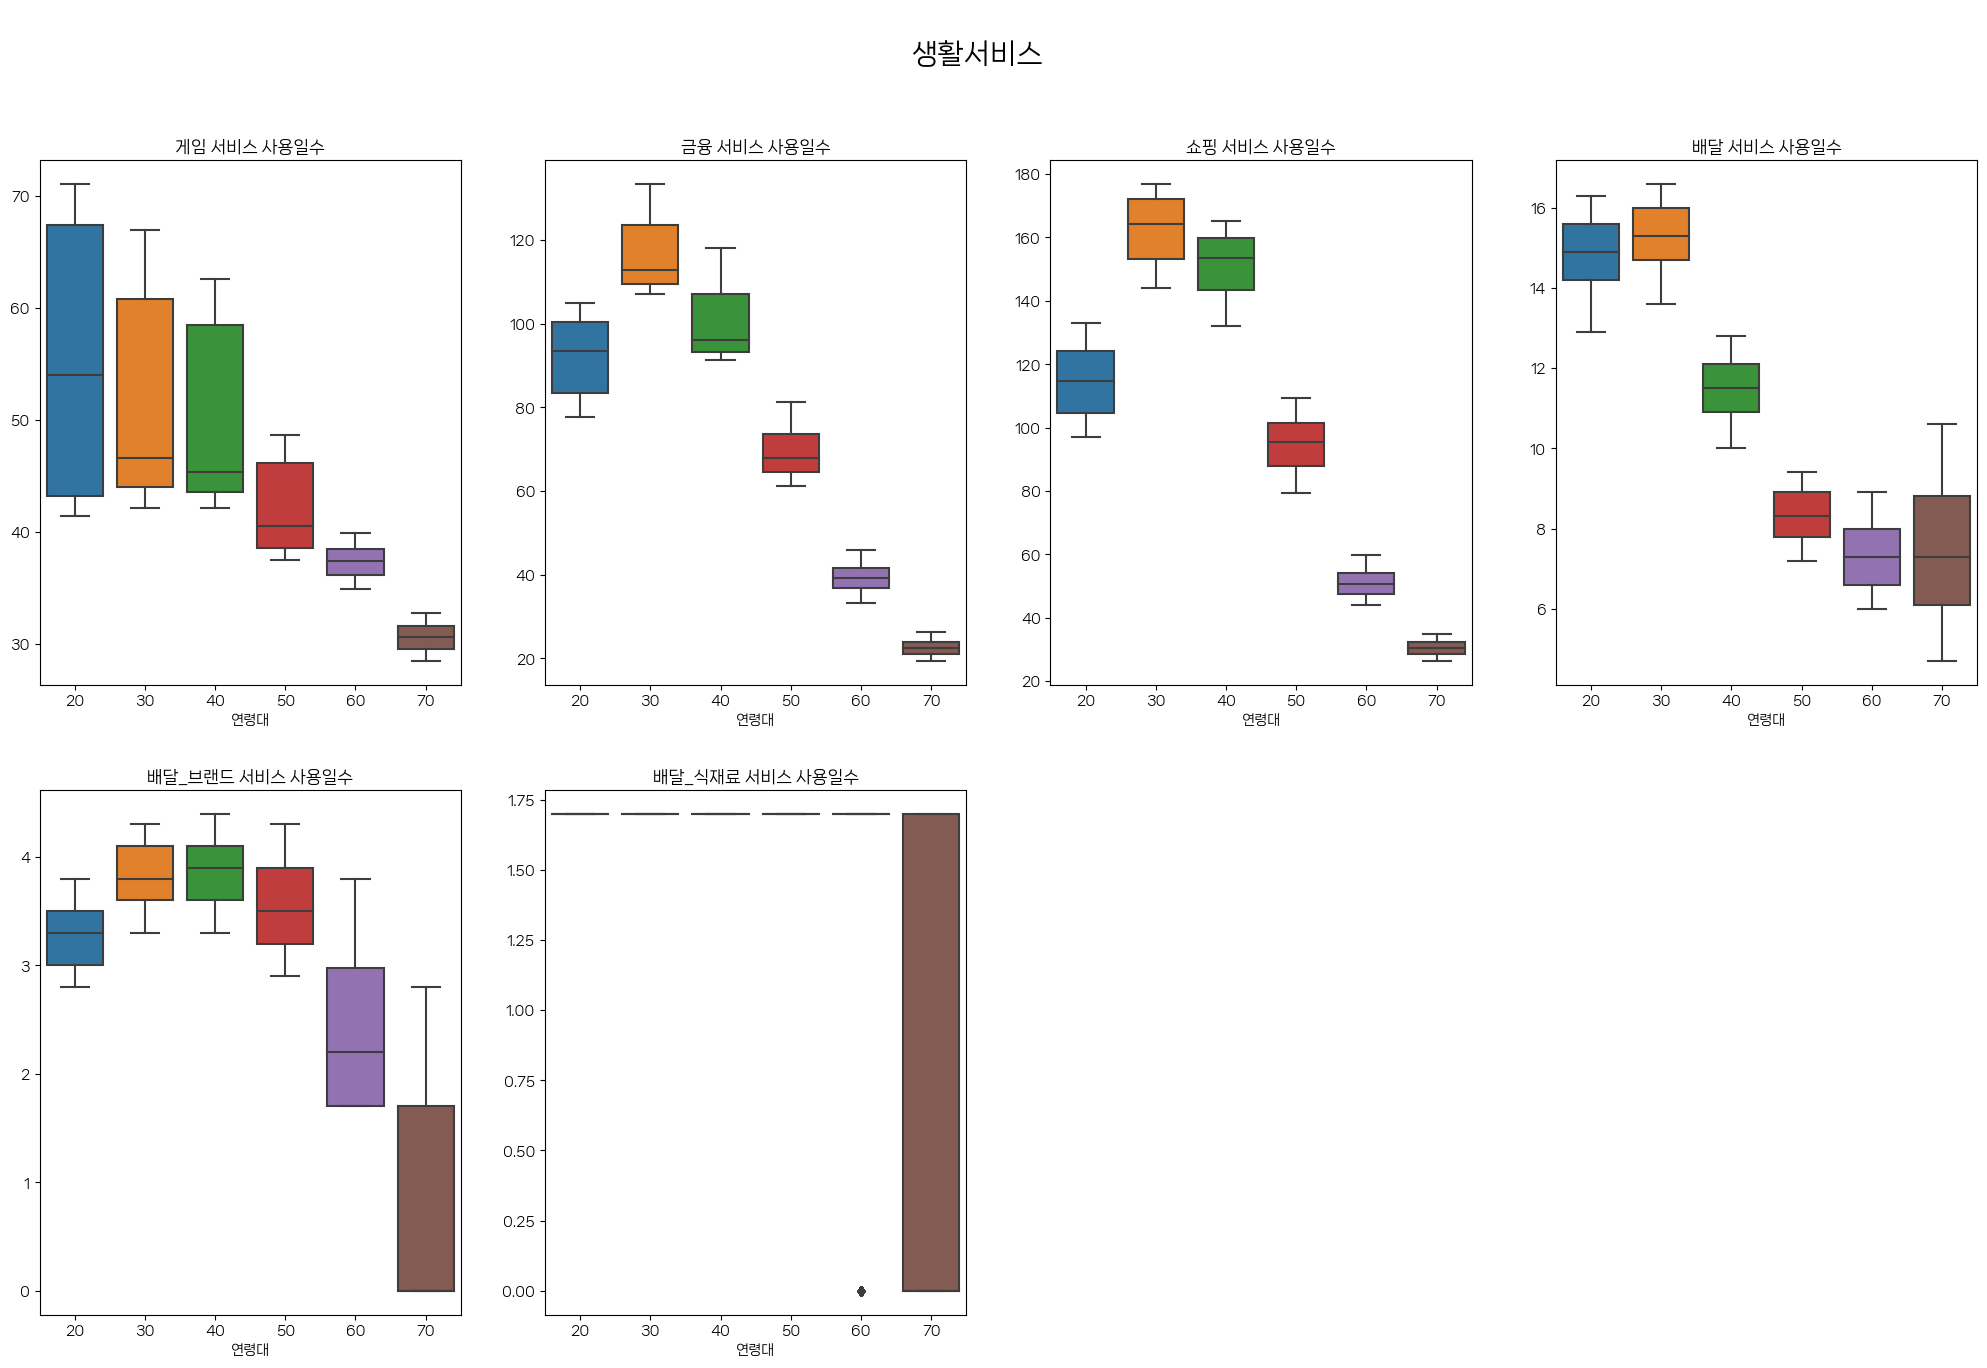

In [72]:
life_col = life.columns[5:]
plt.figure(figsize=(25,15))
for idx, col in enumerate(life_col):
    plt.subplot(2,4,idx+1)
    sns.boxplot(x=life['연령대_1'],y=life[col],data=life,palette='tab10') #hue='부도'
    plt.ylabel('')
    plt.xlabel('연령대')
    plt.title(life_col[idx])   
    plt.suptitle('\n생활서비스', fontsize=20,fontweight='bold')
plt.savefig('./result/생활서비스(후).png')

# 데이터

## 전처리 전

In [37]:
data = 데이터.copy()
len(data.columns[5:])
data.reset_index(drop=True, inplace=True)

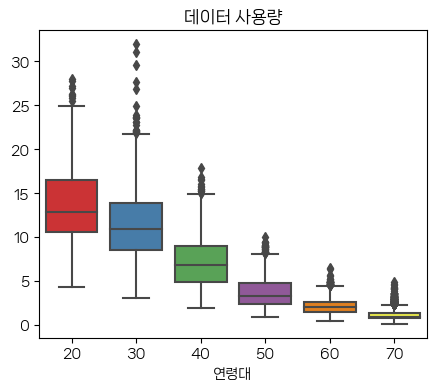

In [38]:
data_col = data.columns[5:]
plt.figure(figsize=(5,4))
for idx, col in enumerate(data_col):
    sns.boxplot(x=data['연령대_1'],y=data[col],data=data,palette='Set1') #hue='부도'
    plt.ylabel('')
    plt.xlabel('연령대')
    plt.title(data_col[idx])   
    # plt.suptitle('\n데이터', fontsize=20,fontweight='bold')
plt.savefig('./result/데이터사용량(전).png')

## 전처리 후

In [39]:
remove_outlier(data,data_col)

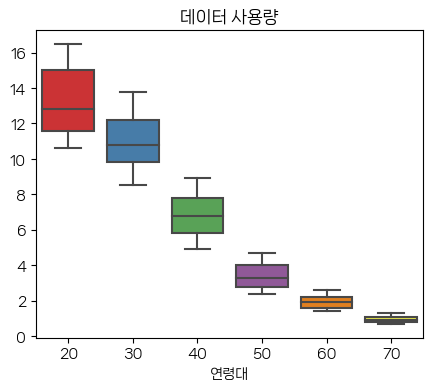

In [40]:
data_col = data.columns[5:]
plt.figure(figsize=(5,4))
for idx, col in enumerate(data_col):
    sns.boxplot(x=data['연령대_1'],y=data[col],data=data,palette='Set1') #hue='부도'
    plt.ylabel('')
    plt.xlabel('연령대')
    plt.title(data_col[idx])   
    # plt.suptitle('\n데이터', fontsize=20,fontweight='bold')
plt.savefig('./result/데이터사용량(후).png')